In [1]:
#!pip install autoviml

In [2]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [3]:
import pandas as pd
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/'+'titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.00,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.00,1,0,71.28
2,1,3,Miss. Laina Heikkinen,female,26.00,0,0,7.92
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.00,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.00,0,0,8.05


In [4]:
num = int(0.9*df.shape[0])
train = df[:num]
print(train.shape)
test = df[num:]
print(test.shape)

(798, 8)
(89, 8)


In [5]:
#Defining some parameter variables

target = 'Survived'
sample_submission=''
scoring_parameter = 'balanced-accuracy'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (798, 8)
    Training Set Memory Usage = 0.05 MB
Test Set Shape = (89, 8)
    Test Set Memory Usage = 0.01 MB
Single_Label Target: ['Survived']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
       Class  -> Counts -> Percent
           0:     489  ->   61.3%
           1:     309  ->   38.7%
    Target Survived is already numeric. No transformation done.
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Colu

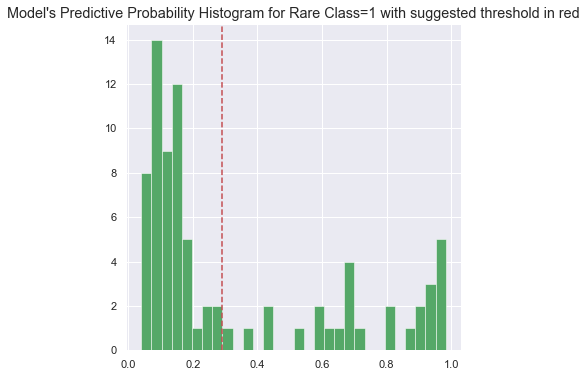

    Using threshold=0.5. However, 0.289 provides better F1=0.83 for rare class...
########################################################
XGBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 85.0%
Balanced Accuracy = 84.46% with Threshold = 0.50
Confusion Matrix:
[[48  1]
 [ 9 22]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        49
           1       0.96      0.71      0.81        31

    accuracy                           0.88        80
   macro avg       0.90      0.84      0.86        80
weighted avg       0.89      0.88      0.87        80

Balanced Accuracy = 86.24% with Threshold = 0.29
Confusion Matrix:
[[45  4]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.86      0.81      0.83        31

    accuracy                           0.88        80
   macro avg       0.87      0.86      0.87        

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 86.2%
    Balanced Accuracy = 84.0%
    Precision         = 88.5%
    Average Precision = 86.8%
    Recall            = 74.2%
    F1 Score          = 80.7%
#####################################################
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        49
           1       0.88      0.74      0.81        31

    accuracy                           0.86        80
   macro avg       0.87      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80

[[46  3]
 [ 8 23]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


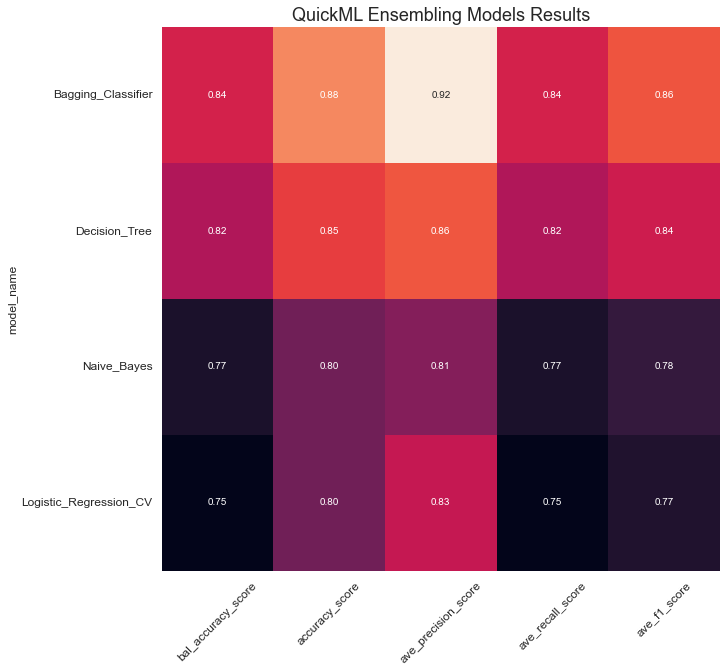

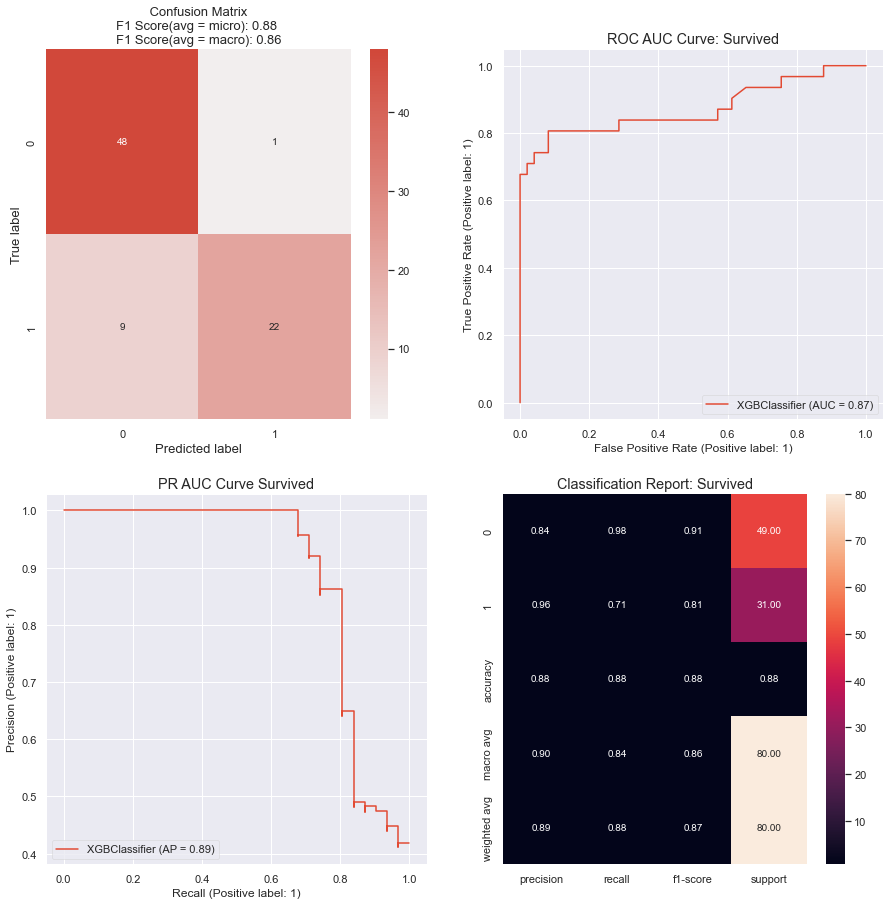

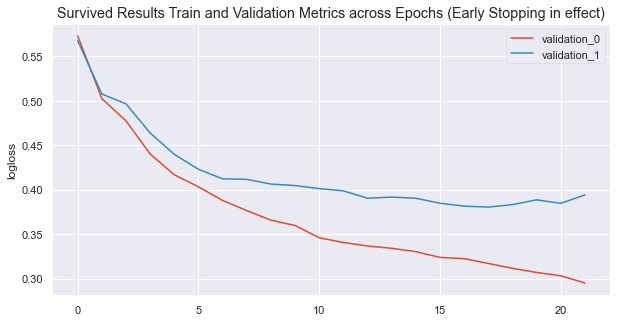

    Time taken for this Target (in seconds) = 59
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using modified Threshold = 0.289
    Calculating weighted average ensemble of 5 classifiers
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 60
Writing Output files to disk...
    Saving predictions to .\Survived\Survived_Binary_Classification_test_modified.csv
    Saving predictions to .\Survived\Survived_Binary_Classification_submission.csv
    Saving predictions to .\Survived\Survived_Binary_Classification_train_modified.csv
##

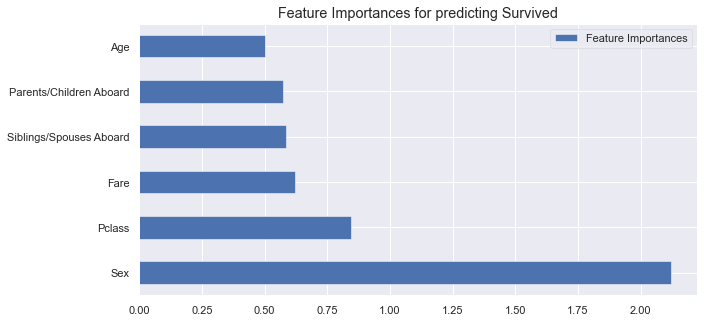

In [6]:
#Modelling using XGBoost  

m, feats, trainm, testm = Auto_ViML(train, target, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)  
